# Bab 8: Dimensionality Reduction (Reduksi Dimensi)

### 1. Pendahuluan

Bab 8 membahas konsep **Reduksi Dimensi**, sebuah teknik penting dalam *Machine Learning* yang bertujuan untuk mengurangi jumlah fitur (dimensi) dalam dataset. Meskipun memiliki banyak fitur bisa membantu, terlalu banyak fitur dapat menyebabkan masalah.

#### "Curse of Dimensionality" (Kutukan Dimensi)
Dalam ruang berdimensi tinggi, data menjadi sangat jarang (*sparse*). *Instance training* cenderung sangat jauh satu sama lain, membuat prediksi yang andal menjadi sulit dan model cenderung *overfitting*.

#### Manfaat Reduksi Dimensi:
* Mempercepat algoritma pelatihan.
* Mengurangi kebutuhan memori.
* Membantu memvisualisasikan data.
* Berpotensi meningkatkan kinerja dengan mengurangi *noise*.

Bab ini akan mengeksplorasi dua pendekatan utama: **Proyeksi (Projection)** dan **Pembelajaran Manifold (Manifold Learning)**.

---

### 2. Principal Component Analysis (PCA)

PCA adalah algoritma reduksi dimensi paling populer. Ini mengidentifikasi *hyperplane* (bidang) yang paling dekat dengan data, kemudian memproyeksikan data ke *hyperplane* tersebut sambil memaksimalkan varians.

#### a. PCA untuk Kompresi dan Rekonstruksi
Dengan PCA, kita bisa mengurangi jumlah fitur secara signifikan sambil tetap mempertahankan sebagian besar informasi (varians) dari dataset.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Memuat dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# Membagi data untuk demonstrasi
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Inisialisasi PCA untuk mempertahankan 95% dari varians
# Scikit-Learn secara otomatis memilih jumlah komponen yang tepat
pca = PCA(n_components=0.95)

# Melakukan reduksi dimensi pada training set
X_train_reduced = pca.fit_transform(X_train)

print("Jumlah komponen setelah PCA (95% varians):", pca.n_components_)
print("Dimensi data asli:", X_train.shape)
print("Dimensi data setelah reduksi:", X_train_reduced.shape)

# Kita bisa merekonstruksi data kembali (dengan sedikit kehilangan informasi)
X_train_recovered = pca.inverse_transform(X_train_reduced)

c:\Users\Khalif Prawira\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\datasets\_openml.py:72: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


Jumlah komponen setelah PCA (95% varians): 154
Dimensi data asli: (60000, 784)
Dimensi data setelah reduksi: (60000, 154)


Dengan PCA, kita bisa mengurangi jumlah fitur dari 784 menjadi sekitar 154 sambil tetap mempertahankan 95% varians.

### b. Varian PCA
* **Incremental PCA (IPCA)**: Berguna untuk dataset besar yang tidak muat dalam memori (out-of-core). Ia memproses data dalam mini-batch.
* **Randomized PCA**: Algoritma stokastik yang menemukan perkiraan PC dengan cepat, sangat efisien jika jumlah dimensi target jauh lebih kecil dari dimensi asli.

---

### 3. Kernel PCA (kPCA)
Untuk data yang tidak dapat dipisahkan secara linier dan terletak pada manifold yang kompleks (seperti "Swiss roll"), PCA linier tidak akan efektif. Di sinilah Kernel PCA (kPCA) berperan. kPCA menerapkan kernel trick (seperti pada SVM) untuk melakukan proyeksi non-linier.

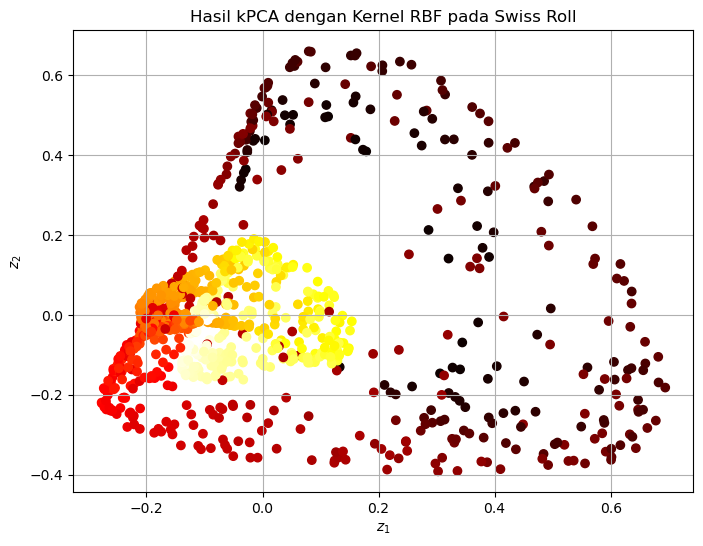

In [3]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Membuat dataset Swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Menggunakan KernelPCA dengan kernel RBF untuk membuka lipatan manifold
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

# Plot hasil
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.title("Hasil kPCA dengan Kernel RBF pada Swiss Roll")
plt.xlabel(r"$z_1$") # Corrected line
plt.ylabel(r"$z_2$") # Corrected line
plt.grid(True)
plt.show()


Plot di atas menunjukkan bagaimana kPCA berhasil "membuka" gulungan Swiss roll menjadi representasi 2D yang jauh lebih berguna.

---

### 4. Locally Linear Embedding (LLE)
LLE adalah teknik Manifold Learning non-linier lain yang tidak mengandalkan proyeksi. LLE bekerja dengan mengidentifikasi hubungan linier lokal setiap instance dengan tetangga terdekatnya, lalu mencoba mereproduksi hubungan tersebut di ruang berdimensi lebih rendah.

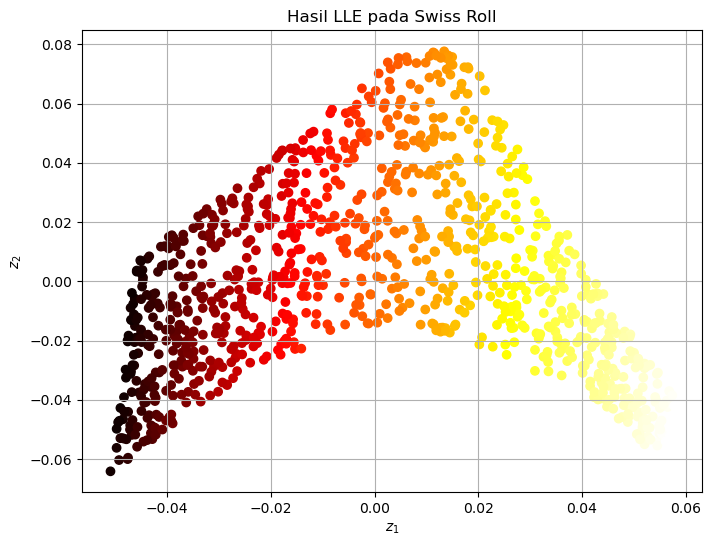

In [5]:
from sklearn.manifold import LocallyLinearEmbedding

# Menggunakan dataset Swiss roll yang sama
# n_neighbors adalah hyperparameter penting yang perlu di-tune
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_lle = lle.fit_transform(X)

# Plot hasil
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], c=t, cmap=plt.cm.hot)
plt.title("Hasil LLE pada Swiss Roll")
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.grid(True)
plt.show()

Sama seperti kPCA, LLE berhasil membuka lipatan Swiss roll. Teknik yang berbeda mungkin bekerja lebih baik pada dataset yang berbeda, sehingga seringkali ada baiknya mencoba beberapa pendekatan.

---

### 5. Teknik Reduksi Dimensi Lainnya
* **Multidimensional** Scaling (MDS): Mencoba mempertahankan jarak antar instance.
* **Isomap**: Mencoba mempertahankan jarak geodetik (jarak terpendek di sepanjang manifold).
* **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: Terutama digunakan untuk visualisasi. Sangat baik untuk memvisualisasikan cluster data dalam 2D atau 3D.
* **Linear Discriminant Analysis (LDA)**: Teknik klasifikasi yang juga dapat digunakan untuk reduksi dimensi. Ini adalah algoritma supervised, artinya ia menggunakan label kelas untuk mencari sumbu yang paling baik dalam memisahkan kelas-kelas tersebut.

---

### 6. Kesimpulan
Bab ini memberikan pemahaman komprehensif tentang pentingnya reduksi dimensi untuk mengatasi "kutukan dimensi". Berbagai algoritma populer dibahas, mulai dari PCA sebagai teknik proyeksi linier yang fundamental, hingga Kernel PCA dan LLE sebagai metode manifold learning non-linier.